In [2]:
from satellite_simulations_3Oct2019 import *
import seaborn as sns
import matplotlib.pyplot as plt
from qutipy import *

In [80]:
##### We only consider the case n1=n2=n and eta1=eta2=eta throughout this code
##### Note that eta here is for the channel from the satellite to ONE of the ground stations

def X(n,eta):
    
    return (1-n)*eta+(n/2)*((1-2*eta)**2+eta**2)

def Y(n,eta):
    
    return (n/2)*(1-eta)**2

def Z(n,eta):
    
    return (1-n)*eta-n*eta*(1-2*eta)


def P(n,eta,M=1):
    
    ### The assumption n1=n2=n and eta1=eta2=eta is used here
    
    return 1-(1-(X(n,eta)+Y(n,eta))**2)**M


def F(n,eta,fs=1):
    
    ### The assumption n1=n2=n and eta1=eta2=eta is used here
    
    x=X(n,eta)
    y=Y(n,eta)
    z=Z(n,eta)
    
    a=x**2+y**2
    b=z**2
    c=2*x*y
    
    f=(1/2)*fs*(a+b)+(1/2)*((1-fs)/3)*(a+2*c-b)
    
    return f/P(n,eta)


def rho_0(n,eta,fs=1,M=1,normalized=False):
    
    ## Source state is a Werner state with fidelity fs to the 
    ## maximally entangled state
    
    x=X(n,eta)
    y=Y(n,eta)
    z=Z(n,eta)
    
    p=P(n,eta,M)
    
    a=x**2+y**2
    b=z**2
    c=2*x*y
    
    Bell1=(1/np.sqrt(2))*(ket(2,[0,0])+ket(2,[1,1]))
    Bell1=Bell1*Bell1.H
    
    Bell2=(1/np.sqrt(2))*(ket(2,[0,0])-ket(2,[1,1]))
    Bell2=Bell2*Bell2.H

    Bell3=(1/np.sqrt(2))*(ket(2,[0,1])+ket(2,[1,0]))
    Bell3=Bell3*Bell3.H
    
    Bell4=(1/np.sqrt(2))*(ket(2,[0,1])-ket(2,[1,0]))
    Bell4=Bell4*Bell4.H
    
    p1=(1/2)*fs*(a+b)+(1/2)*((1-fs)/3)*(a+2*c-b)
    p2=(1/2)*fs*(a-b)+(1/2)*((1-fs)/3)*(a+2*c+b)
    p3=(1/2)*fs*c+((1-fs)/3)*(a+(1/2)*c)
    p4=(1/2)*fs*c+((1-fs)/3)*(a+(1/2)*c)
    
    rho=p1*Bell1+p2*Bell2+p3*Bell3+p4*Bell4
    
    if normalized:
        return rho/np.trace(rho)
    else:
        return (1/p)*(1-(1-p)**M)*rho
    
    
def ent(n,eta,fs=1):
    
    rho=rho_0(n,eta,fs,normalized=True)
    
    return log_negativity(rho,2,2)


def region(D,H,n,fs=1):
    
    eta=np.array([[eta_Tot(link_distance(d*1e3,h*1e3),h*1e3) for d in D] for h in H])

    X=(1-n)*eta+(n/2)*((1-2*eta)**2+eta**2)
    Y=(n/2)*(1-eta)**2
    Z=(1-n)*eta-n*eta*(1-2*eta)
    
    cond=2*(X**2+Y**2)*(fs-1)+Z**2*(4*fs-1)-(2*X*Y)*(1+2*fs)
    
    cond=(cond>0)*1
    
    d,h=np.meshgrid(D,H)
    
    return d,h,cond


def region_fidelity(D,H,n,fs=1):
    
    eta=np.array([[eta_Tot(link_distance(d*1e3,h*1e3),h*1e3) for d in D] for h in H])

    X=(1-n)*eta+(n/2)*((1-2*eta)**2+eta**2)
    Y=(n/2)*(1-eta)**2
    Z=(1-n)*eta-n*eta*(1-2*eta)
    
    A=X**2+Y**2
    B=Z**2
    C=2*X*Y
    
    F=((1/2)*fs*(A+B)+(1/2)*((1-fs)/3)*(A+2*C-B))/(A+C)
    
    cond=2*(X**2+Y**2)*(fs-1)+Z**2*(4*fs-1)-(2*X*Y)*(1+2*fs)
    cond=(cond>0)*1
    
    F[cond<=0]=None
    #F2=F*cond
    
    d,h=np.meshgrid(D,H)
    
    return d,h,F


def region2(N,Eta,fs=1):
    
    n,eta=np.meshgrid(N,Eta)
    
    X=(1-n)*eta+(n/2)*((1-2*eta)**2+eta**2)
    Y=(n/2)*(1-eta)**2
    Z=(1-n)*eta-n*eta*(1-2*eta)
    
    cond=2*(X**2+Y**2)*(fs-1)+Z**2*(4*fs-1)-(2*X*Y)*(1+2*fs)
    
    cond=(cond>0)*1
    
    return n,eta,cond

def region2_fidelity(N,Eta,fs=1):
    
    n,eta=np.meshgrid(N,Eta)
    
    X=(1-n)*eta+(n/2)*((1-2*eta)**2+eta**2)
    Y=(n/2)*(1-eta)**2
    Z=(1-n)*eta-n*eta*(1-2*eta)
    
    A=X**2+Y**2
    B=Z**2
    C=2*X*Y
    
    F=((1/2)*fs*(A+B)+(1/2)*((1-fs)/3)*(A+2*C-B))/(A+C)
    
    cond=2*(X**2+Y**2)*(fs-1)+Z**2*(4*fs-1)-(2*X*Y)*(1+2*fs)
    
    cond=(cond>0)*1
    
    F[cond<=0]=None
    
    return n,eta,F
    


In [12]:
L_array[47]

1002.020202020202

In [14]:
P(1e-7,eta_sg_h_1000[47],1e9)

0.1644560065299444

In [15]:
eta_sg_h_1000[47]

1.3304192326506128e-05

In [16]:
L_array=np.linspace(100,2000,100)
h_array=np.linspace(100,10000,5000)

In [20]:
#### Here, we compute the total transmittance to BOTH ground stations

eta_sg_h_500=[eta_Tot(link_distance(d*1e3,500e3),500e3)**2 for d in L_array]
eta_sg_h_1000=[eta_Tot(link_distance(d*1e3,1000e3),1000e3)**2 for d in L_array]
eta_sg_h_2000=[eta_Tot(link_distance(d*1e3,2000e3),2000e3)**2 for d in L_array]
eta_sg_h_3000=[eta_Tot(link_distance(d*1e3,3000e3),3000e3)**2 for d in L_array]
eta_sg_h_4000=[eta_Tot(link_distance(d*1e3,4000e3),4000e3)**2 for d in L_array]
eta_sg_h_5000=[eta_Tot(link_distance(d*1e3,5000e3),5000e3)**2 for d in L_array]

In [21]:
#### Here, we compute the total transmittance to BOTH ground stations

eta_sg_d_1000=[eta_Tot(link_distance(1000e3,h*1e3),h*1e3)**2 for h in h_array]
eta_sg_d_2000=[eta_Tot(link_distance(2000e3,h*1e3),h*1e3)**2 for h in h_array]
eta_sg_d_3000=[eta_Tot(link_distance(3000e3,h*1e3),h*1e3)**2 for h in h_array]
eta_sg_d_4000=[eta_Tot(link_distance(4000e3,h*1e3),h*1e3)**2 for h in h_array]
eta_sg_d_5000=[eta_Tot(link_distance(5000e3,h*1e3),h*1e3)**2 for h in h_array]
eta_sg_d_6000=[eta_Tot(link_distance(6000e3,h*1e3),h*1e3)**2 for h in h_array]

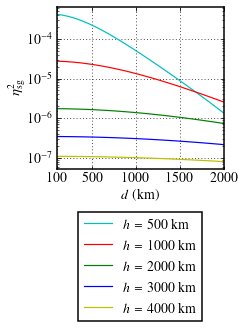

In [11]:
fig=plt.figure(figsize=(3.5,3))


plt.semilogy(L_array,eta_sg_h_500,'-c',label=r'$h=500$ km')
plt.semilogy(L_array,eta_sg_h_1000,'-r',label=r'$h=1000$ km')
plt.semilogy(L_array,eta_sg_h_2000,'-g',label=r'$h=2000$ km')
plt.semilogy(L_array,eta_sg_h_3000,'-b',label=r'$h=3000$ km')
plt.semilogy(L_array,eta_sg_h_4000,'-y',label=r'$h=4000$ km')
    
#plt.semilogy(L_array,R_50,linestyle='--',color='orange')
    
plt.xlabel(r'$d$ (km)',fontsize=14)
plt.ylabel(r'$\eta_{\mathrm{sg}}^2$',fontsize=14)

plt.xticks([100,500,1000,1500,2000],fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([100,2000])
#plt.ylim([1e-11,1e-4])


#plt.grid()

#plt.legend()
fig.legend(loc='center',ncol=1,bbox_to_anchor = (0.070,-0.75,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)


plt.tight_layout()

plt.savefig('eta_sg.pdf',bbox_inches='tight')

plt.show()



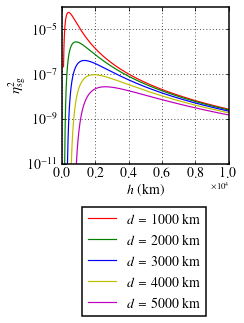

In [16]:
fig=plt.figure(figsize=(3.5,3))


plt.semilogy(h_array,eta_sg_d_1000,'-r',label=r'$d=1000$ km')
plt.semilogy(h_array,eta_sg_d_2000,'-g',label=r'$d=2000$ km')
plt.semilogy(h_array,eta_sg_d_3000,'-b',label=r'$d=3000$ km')
plt.semilogy(h_array,eta_sg_d_4000,'-y',label=r'$d=4000$ km')
plt.semilogy(h_array,eta_sg_d_5000,'-m',label=r'$d=5000$ km')
#plt.semilogy(h_array,eta_sg_d_6000,'-c',label=r'$d=6000$ km')
    
#plt.semilogy(L_array,R_50,linestyle='--',color='orange')
    
plt.xlabel(r'$h$ (km)',fontsize=14)
plt.ylabel(r'$\eta_{\mathrm{sg}}^2$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0,10000])
plt.ylim([1e-11,1e-4])

plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))

#plt.grid()

fig.legend(loc='center',ncol=1,bbox_to_anchor = (0.085,-0.75,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)

#plt.legend()

plt.tight_layout()

plt.savefig('eta_sg_2.pdf',bbox_inches='tight')

plt.show()



In [58]:
#### p as a function of d for fixed h and n=1e-7
#### Here, we must take the square root of the eta because the function P takes the eta for a single channel only

n=1e-4
M=1e5

p_h_500=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_500]
p_h_1000=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_1000]
p_h_2000=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_2000]
p_h_3000=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_3000]
p_h_4000=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_4000]
p_h_5000=[P(n,np.sqrt(eta),M) for eta in eta_sg_h_5000]

In [68]:
#### p as a function of h for fixed d and n=1e-7
#### Here, we must take the square root of the eta because the function P takes the eta for a single channel only

n=1e-4
M=1e5

p_d_1000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_1000]
p_d_2000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_2000]
p_d_3000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_3000]
p_d_4000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_4000]
p_d_5000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_5000]
p_d_6000=[P(n,np.sqrt(eta),M) for eta in eta_sg_d_6000]

In [122]:
p_h_1000[47]

0.7542126606905442

In [124]:
eta_sg_h_1000[47]

1.3304192326506128e-05

In [123]:
L_array[47]

1002.020202020202

In [60]:
#### f as a function of d for fixed h and n=1e-7
#### Here, we must take the square root of the eta because the function P takes the eta for a single channel only

n=1e-4
fs=1

f_h_500=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_500]
f_h_1000=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_1000]
f_h_2000=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_2000]
f_h_3000=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_3000]
f_h_4000=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_4000]
f_h_5000=[F(n,np.sqrt(eta),fs=fs) for eta in eta_sg_h_5000]

In [61]:
#### f as a function of h for fixed d and n=1e-7
#### Here, we must take the square root of the eta because the function P takes the eta for a single channel only

n=1e-4

f_d_1000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_1000]
f_d_2000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_2000]
f_d_3000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_3000]
f_d_4000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_4000]
f_d_5000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_5000]
f_d_6000=[F(n,np.sqrt(eta)) for eta in eta_sg_d_6000]

In [62]:
### log-negativity as a function of d for fixed h and n=1e-7

n=1e-4

ent_h_500=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_500]
ent_h_1000=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_1000]
ent_h_2000=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_2000]
ent_h_3000=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_3000]
ent_h_4000=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_4000]
ent_h_5000=[ent(n,np.sqrt(eta)) for eta in eta_sg_h_5000]




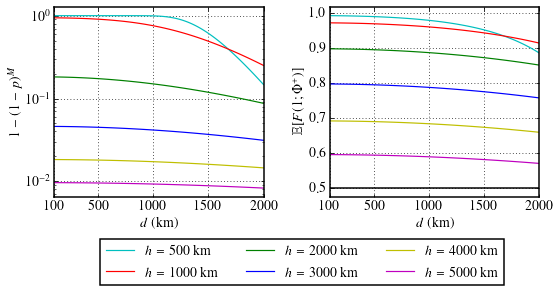

In [113]:
fig,ax=plt.subplots(1,2,figsize=(8,3.5))

ax[0].semilogy(L_array,p_h_500,'-c',label=r'$h=500$ km')
ax[0].semilogy(L_array,p_h_1000,'-r',label=r'$h=1000$ km')
ax[0].semilogy(L_array,p_h_2000,'-g',label=r'$h=2000$ km')
ax[0].semilogy(L_array,p_h_3000,'-b',label=r'$h=3000$ km')
ax[0].semilogy(L_array,p_h_4000,'-y',label=r'$h=4000$ km')
ax[0].semilogy(L_array,p_h_5000,'-m',label=r'$h=5000$ km')

ax[0].set_xlabel(r'$d$ (km)',fontsize=14)
ax[0].set_ylabel(r'$1-(1-p)^M$',fontsize=14)

ax[0].set_xticks([100,500,1000,1500,2000])
ax[0].tick_params(axis="x",labelsize=14)
ax[0].tick_params(axis="y",labelsize=14)

ax[0].set_xlim([100,2000])


ax[1].plot(L_array,f_h_500,'-c')#,label=r'$h=500$ km')
ax[1].plot(L_array,f_h_1000,'-r')#,label=r'$h=1000$ km')
ax[1].plot(L_array,f_h_2000,'-g')#,label=r'$h=2000$ km')
ax[1].plot(L_array,f_h_3000,'-b')#,label=r'$h=3000$ km')
ax[1].plot(L_array,f_h_4000,'-y')#,label=r'$h=4000$ km')
ax[1].plot(L_array,f_h_5000,'-m')#,label=r'$h=5000$ km')

ax[1].plot(L_array,0.5*np.ones(len(L_array)),'-k',linewidth=1.5)

ax[1].set_xlabel(r'$d$ (km)',fontsize=14)
ax[1].set_ylabel(r'$\mathbb{E}[F(1;\Phi^+)]$',fontsize=14)

ax[1].set_xticks([100,500,1000,1500,2000])
ax[1].tick_params(axis="x",labelsize=14)
ax[1].tick_params(axis="y",labelsize=14)

ax[1].set_xlim([100,2000])


fig.legend(loc='center',ncol=3,bbox_to_anchor = (0.038,-0.57,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)


plt.tight_layout(pad=1.5)

fig.savefig('p_sg.pdf',bbox_inches='tight')

fig.show()



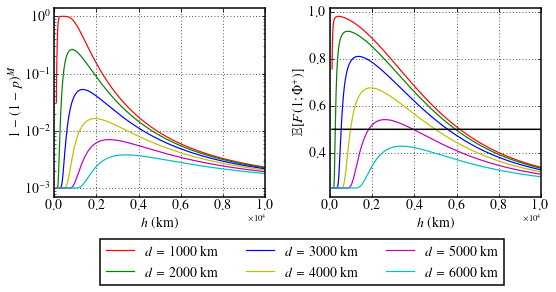

In [115]:
fig,ax=plt.subplots(1,2,figsize=(8,3.5))

ax[0].semilogy(h_array,p_d_1000,'-r',label=r'$d=1000$ km')
ax[0].semilogy(h_array,p_d_2000,'-g',label=r'$d=2000$ km')
ax[0].semilogy(h_array,p_d_3000,'-b',label=r'$d=3000$ km')
ax[0].semilogy(h_array,p_d_4000,'-y',label=r'$d=4000$ km')
ax[0].semilogy(h_array,p_d_5000,'-m',label=r'$d=5000$ km')
ax[0].semilogy(h_array,p_d_6000,'-c',label=r'$d=6000$ km')
    
ax[0].set_xlabel(r'$h$ (km)',fontsize=14)
ax[0].set_ylabel(r'$1-(1-p)^M$',fontsize=14)

ax[0].tick_params(axis="x",labelsize=14)
ax[0].tick_params(axis="y",labelsize=14)

ax[0].set_xlim([0,10000])
#ax[0].set_ylim([1e-5,1.5])

ax[0].ticklabel_format(axis='x',style='sci',scilimits=(0,0))



ax[1].plot(h_array,f_d_1000,'-r')#,label=r'$d=1000$ km')
ax[1].plot(h_array,f_d_2000,'-g')#,label=r'$d=2000$ km')
ax[1].plot(h_array,f_d_3000,'-b')#,label=r'$d=3000$ km')
ax[1].plot(h_array,f_d_4000,'-y')#,label=r'$d=4000$ km')
ax[1].plot(h_array,f_d_5000,'-m')#,label=r'$d=5000$ km')
ax[1].plot(h_array,f_d_6000,'-c')#,label=r'$d=5000$ km')

ax[1].plot(h_array,0.5*np.ones(len(h_array)),'-k',linewidth=1.5)

ax[1].set_xlabel(r'$h$ (km)',fontsize=14)
ax[1].set_ylabel(r'$\mathbb{E}[F(1;\Phi^+)]$',fontsize=14)

ax[1].tick_params(axis="x",labelsize=14)
ax[1].tick_params(axis="y",labelsize=14)

ax[1].set_xlim([0,10000])
#plt.ylim([1e-5,1.5])

ax[1].ticklabel_format(axis='x',style='sci',scilimits=(0,0))


#plt.grid()

fig.legend(loc='center',ncol=3,bbox_to_anchor = (0.038,-0.57,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)

#plt.legend()

plt.tight_layout(pad=1.5)

plt.savefig('p_sg_2.pdf',bbox_inches='tight')

plt.show()



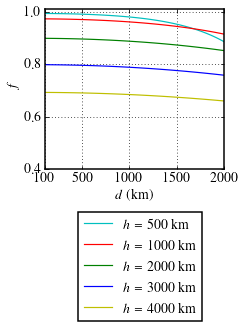

In [71]:
fig=plt.figure(figsize=(3.5,3))


plt.plot(L_array,f_h_500,'-c',label=r'$h=500$ km')
plt.plot(L_array,f_h_1000,'-r',label=r'$h=1000$ km')
plt.plot(L_array,f_h_2000,'-g',label=r'$h=2000$ km')
plt.plot(L_array,f_h_3000,'-b',label=r'$h=3000$ km')
plt.plot(L_array,f_h_4000,'-y',label=r'$h=4000$ km')
    

plt.xlabel(r'$d$ (km)',fontsize=14)
plt.ylabel(r'$f$',fontsize=14)

plt.xticks([100,500,1000,1500,2000],fontsize=14)
plt.yticks([0.4,0.6,0.8,1.0],fontsize=14)

plt.xlim([100,2000])
#plt.ylim([1e-11,1e-4])


#plt.grid()

#plt.legend()
fig.legend(loc='center',ncol=1,bbox_to_anchor = (0.070,-0.75,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)


plt.tight_layout()

plt.savefig('f_sg.pdf',bbox_inches='tight')

plt.show()



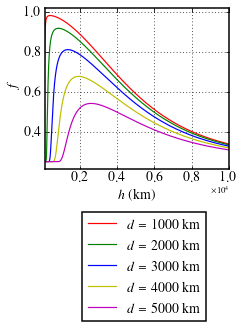

In [72]:
fig=plt.figure(figsize=(3.5,3))


plt.plot(h_array,f_d_1000,'-r',label=r'$d=1000$ km')
plt.plot(h_array,f_d_2000,'-g',label=r'$d=2000$ km')
plt.plot(h_array,f_d_3000,'-b',label=r'$d=3000$ km')
plt.plot(h_array,f_d_4000,'-y',label=r'$d=4000$ km')
plt.plot(h_array,f_d_5000,'-m',label=r'$d=5000$ km')
    
plt.xlabel(r'$h$ (km)',fontsize=14)
plt.ylabel(r'$f$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([100,10000])
#plt.ylim([1e-5,1.5])

plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))

#plt.grid()

fig.legend(loc='center',ncol=1,bbox_to_anchor = (0.085,-0.75,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)

#plt.legend()

plt.tight_layout()

plt.savefig('f_sg_2.pdf',bbox_inches='tight')

plt.show()



In [81]:
D_array=np.linspace(100,6000,600)
H_array=np.linspace(100,10000,600)


d,h,cond=region(D_array,H_array,1e-4)

In [82]:
d,h,fid_reg=region_fidelity(D_array,H_array,1e-4)

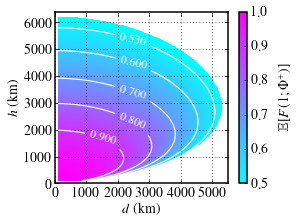

In [119]:
fig=plt.figure(figsize=(4.2,3.2))

plt.imshow(fid_reg,cmap='cool',aspect='auto',origin='lower',vmin=0.5,vmax=1,extent=[100,6000,100,10000])

#ax=sns.heatmap(fid_reg)

#plt.contourf(d,h,fid_reg,levels=[0.1,0.15,0.2,0.4,0.6,0.8,0.85,0.9,0.95,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\mathbb{E}[F(1;\Phi^+)]$',fontsize=14,labelpad=10)

CS=plt.contour(D_array,H_array,fid_reg,[0.53,0.60,0.7,0.8,0.9],colors='white')
plt.clabel(CS, inline=True, fontsize=12, manual=[(2500,5500),(2500,4500),(2500,3500),(2500,2500),(1500,1500)])

plt.xlabel(r'$d$ (km)',fontsize=14)
plt.ylabel(f'$h$ (km)',fontsize=14)

plt.xlim([0,5500])
plt.ylim([0,6400])


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('ent_sg_fid.pdf',bbox_inches='tight')

plt.show()

In [126]:
cond

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

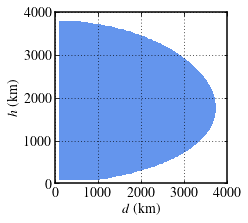

In [87]:
fig=plt.figure(figsize=(3.55,3.2))


plt.contourf(d,h,cond,levels=[0.5,1],colors=['cornflowerblue'])

plt.xlabel(r'$d$ (km)',fontsize=14)
plt.ylabel(f'$h$ (km)',fontsize=14)

plt.xlim([0,4000])
plt.ylim([0,4000])

plt.xticks(fontsize=14)
plt.yticks([0,1000,2000,3000,4000],fontsize=14)

plt.tight_layout()

plt.savefig('ent_sg.pdf',bbox_inches='tight')

plt.show()


In [108]:
N_array=np.linspace(0,1,600)
Eta_array=np.linspace(0,1,600)

n,eta,cond2=region2(N_array,Eta_array)
n,eta,fid2_reg=region2_fidelity(N_array,Eta_array)

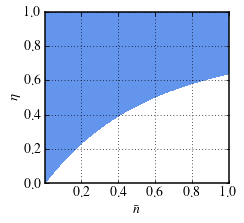

In [122]:
fig=plt.figure(figsize=(3.5,3.2))


plt.contourf(n,eta,cond2,levels=[0.5,1],colors=['cornflowerblue'])

plt.xlabel(r'$\bar{n}$',fontsize=14)
plt.ylabel(f'$\eta$',fontsize=14)

plt.xticks([0.2,0.4,0.6,0.8,1.0],fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('ent_sg_all.pdf',bbox_inches='tight')

plt.show()

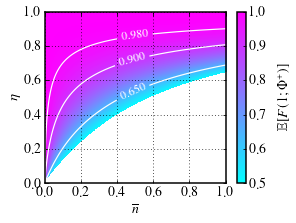

In [130]:
fig=plt.figure(figsize=(4.2,3.2))

plt.imshow(fid2_reg,cmap='cool',aspect='auto',origin='lower',vmin=0.5,vmax=1,extent=[0,1,0,1])

#ax=sns.heatmap(fid_reg)

#plt.contourf(d,h,fid_reg,levels=[0.1,0.15,0.2,0.4,0.6,0.8,0.85,0.9,0.95,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\mathbb{E}[F(1;\Phi^+)]$',fontsize=14,labelpad=10)

CS=plt.contour(N_array,Eta_array,fid2_reg,[0.65,0.9,0.98],colors='white')
plt.clabel(CS, inline=True, fontsize=12, manual=[(0.5,0.5),(0.5,0.65),(0.5,0.85)])

plt.xlabel(r'$\overline{n}$',fontsize=14)
plt.ylabel(f'$\eta$',fontsize=14)

#plt.xlim([0,4000])
#plt.ylim([0,4000])


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('ent_sg_all_fid.pdf',bbox_inches='tight')

plt.show()